# Trabajo Práctico: Regresión Lineal Simple

**Integrantes:** Milena Mercado Pazos,Ignacio Piquin Villegas, Javier Benavides Merchan  

**Descripción:**  
1) Actividad 1: Realizada por Milena Mercado Paozos
en este Notebook genero un dataset de ejemplo con 100 puntos, donde `y` tiene una relación lineal con `x` más un poco de ruido para simular datos reales.  
Después implemento desde cero la función de costo de la regresión lineal simple, que me permite calcular qué tan bien se ajusta una recta (`y = w*x + b`) a los datos.  
La idea es ir viendo el error inicial del modelo y prepararme para después calcular los gradientes y entrenar el modelo usando gradiente descendente.  

Incluí un gráfico de dispersión para visualizar los datos y comentarios en el código para que se entienda paso a paso lo que hace cada parte.


El valor de x del primer ejemplo es 23.13961929800238 y el valor de y es 10.363555953983601
La cantidad de ejemplos es 100


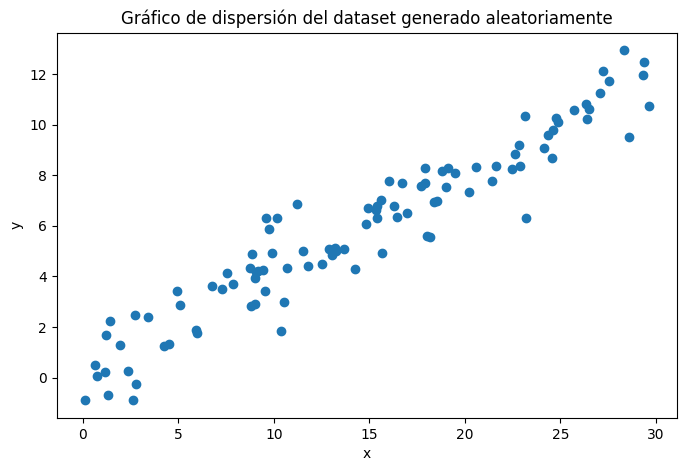

In [5]:

import numpy as np
import math
import matplotlib.pyplot as plt

m = 100   # nro de ejemplos

# Semilla para reproducibilidad
np.random.seed(10)

# Variable independiente (x): valores aleatorios entre 0 y 30
x_train = 30 * np.random.rand(m, 1)

# Variable dependiente (y): relacionada linealmente con x más un poco de ruido
y_train = 0.4 * x_train + np.random.randn(m, 1)

# Convertimos a vectores 
x_train = x_train.flatten()
y_train = y_train.flatten()

# Verificamos
print(f"El valor de x del primer ejemplo es {x_train[0]} y el valor de y es {y_train[0]}")
print(f"La cantidad de ejemplos es {x_train.shape[0]}")

# Graficar dataset 
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train)
plt.title("Gráfico de dispersión del dataset generado aleatoriamente")
plt.ylabel('y')
plt.xlabel('x')
plt.show()


In [ ]:
def calcular_costo(x, y, w, b): 
    """
    Calcula el MSE (Mean Squared Error) que presenta un modelo dado en relación a los datos. 
    
    Args:
      x: arreglo con los valores del feature x para cada ejemplo
      y: arreglo con los valores del label y para cada ejemplo
      w,b: parámetros del modelo conocido (numéricos)
    
    Objetivo:
        La función debe retornar el costo del modelo dado por parámetro
    """
    m = x.shape[0]  # cantidad de ejemplos
    cost_sum = 0
    
    # recorremos cada ejemplo
    for i in range(m):
        # 1.a calcular f(x)
        f_x = w * x[i] + b
        
        # 1.b calcular el costo cuadratico
        cost = (f_x - y[i])**2
        
        # 1.c acumular
        cost_sum += cost
    
    # 2. costo promedio
    total_cost = (1/(2*m)) * cost_sum
    
    return total_cost
    
print(calcular_costo(x_train, y_train, w=0, b=0))



22.98893957959641


### <font color='red'>**Actividad 3 (realizada por Ignacio Piquin Villegas):**</font>


Desarrollar una función que calcule el gradiente descendente, es decir, que actualice los valores de w y de b utilizando la función desarrollada en la actividad anterior.

In [ ]:
def gradiente_descendente(x, y, max_iterations, alpha): 
    """
    Calcula el gradiente descendente para encontrar los valores óptimos de w y b.
    
    Args:
      x: arreglo con los valores del feature x para cada ejemplo
      y: arreglo con los valores del label y para cada ejemplo
      max_iterations: máximo de iteraciones
      alpha: learning rate
      
    Returns:
      w: valor de w luego de converger
      b: valor de b luego de converger
      J_history (List): valores históricos del costo (para graficar)
      wb_history (list): valores históricos de w y de b (para graficar)
      """
        
    # Estos arreglos sirven para ir guardando los valores del costo y de los parámetros para graficarlos al final
    J_hist = []
    wb_hist = []
    
    w = 0
    b = 0
    
    # Repetir hasta el máximo de iteraciones
    for i in range(max_iterations):
        
        # Calcular las derivadas
        dj_w, dj_b = calcular_derivadas(x, y, w, b)     

        # Actualizar los valores de w y b             
        w =  w - alpha * dj_w
        
        b = b - alpha * dj_b
        
        costo = calcular_costo(x, y, w , b)
        
        # Guardar el costo y los parámetros de la iteración
        J_hist.append(costo)
        wb_hist.append([w,b])
            
        # Imprime el costo cada ~10% del total de iteraciones.
        if i% math.ceil(max_iterations/10) == 0:
            print(f"Iteración {i:4}: Cost {J_hist[-1]:0.2e} ", f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    # retorna w, b y los arreglos con los costos y parámetros de cada iteración
    return w, b, J_hist, wb_hist 